UNSUPERVISED LEARNING ALGORITHM


In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np

In [11]:
customer_data = pd.read_csv(r"Mall_Customers.csv",encoding='latin1')
print(customer_data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [17]:
print(customer_data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [15]:
# data_encoded = pd.get_dummies(customer_data, columns=['Gender'])
# print(data_encoded.head())


In [19]:
X = customer_data.iloc[:, [3, 4]].values #annual income and spending score
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [27]:
#WITHIN CLUSTER SUM OF SQUARES
wcss =[] #empty list to find how many clusters are there
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)    #init='k-means++': A smarter centroid initialization to speed up convergence.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

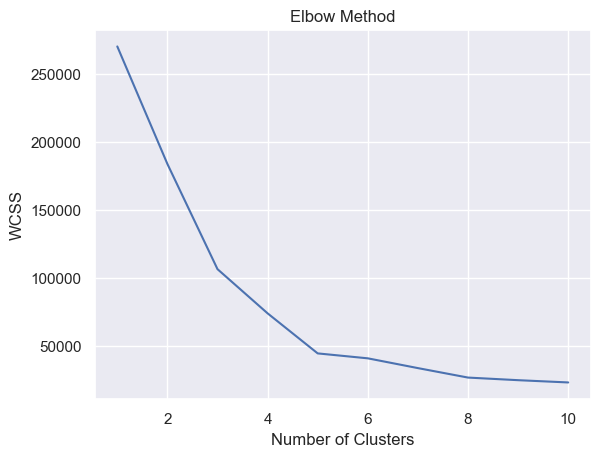

In [ ]:
#ELBOW GRAPH
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
#From the graph we can see that the elbow is at 5 so we take number of clusters as 5

In [31]:
#This array y contains cluster labels assigned by KMeans to each data point in your dataset.
# For example, if y[0] is 3, it means the first data point belongs to cluster 3.
# If y[10] is 4, the 11th point belongs to cluster 4, and so on.

clusters = 5
kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)   
y = kmeans.fit_predict(X)
print(y)

[3 4 7 4 3 4 7 4 7 4 7 4 7 4 7 4 3 4 3 4 3 4 7 4 7 4 3 4 3 4 7 4 7 4 7 4 7
 4 3 4 3 4 3 6 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 0 6 6 0 6 0 6 6 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 9 2 1 2 9 2 9 2 1 0 1 2 1 0 9
 2 1 2 1 2 9 2 1 2 9 2 9 2 1 2 1 2 9 2 1 2 9 2 9 2 1 2 9 2 9 2 9 8 9 8 9 8
 1 8 9 8 9 8 9 8 5 8 5 8 5 8 5]


In [32]:
clusters = 0,1,2,3,4

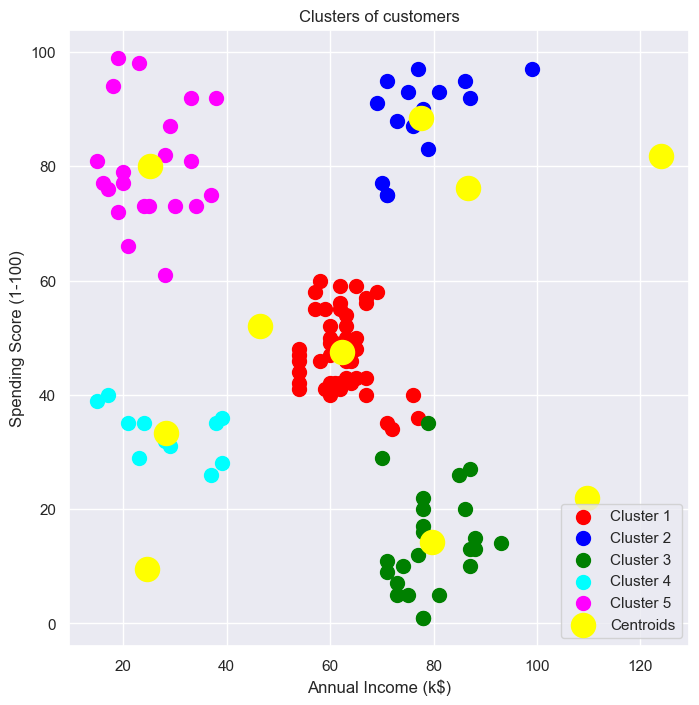

In [ ]:
plt.figure(figsize=(8, 8)) #Creates a square figure of size 8x8 inches.
#X is your dataset (likely 2D features, for example Annual Income and Spending Score).
#y is the array of cluster labels you got from KMeans (y == 0 means points in cluster 0, etc.).
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')   # Marker size s=100 for visibility.
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y == 3, 0], X[y == 3, 1 ], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y == 4, 0], X[y == 4, 1 ], s = 100, c = 'magenta', label = 'Cluster 5')


# Plotting the centroids of the clusters
#It plots these centroids as big yellow dots (s=300 makes them larger).
#These show the “center points” of each cluster on the graph.
#kmeans.cluster_centers_ gives the coordinates of the cluster centers found by KMeans.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()    
plt.show()